<h1 style="color:navy; text-align:center;">Covid-19 Cases Analysis</h1>


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [ ]:
df = pd.read_csv(r"C:\Users\hrith\Downloads\country_wise_latest.csv")

### Exploring the data

In [4]:
df.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [6]:
df.shape

(187, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

### Removing Duplicates

In [9]:
df.drop_duplicates(inplace = True)

### Formatting 

In [10]:
df['Country/Region'] = df['Country/Region'].replace('United Kingdom', 'UK')

In [11]:
df["WHO Region"] = df["WHO Region"].replace("Eastern Mediterranean", "E. Mediterranean")
df["WHO Region"] = df["WHO Region"].replace("Western Pacific", "W. Pacific")
df["WHO Region"] = df["WHO Region"].replace("South-East Asia", "S. E. Asia")
df['Country/Region'] = df["Country/Region"].replace("Western Sahara", "W. Sahara")

### Calculating Maximum Number of Deaths

In [12]:
max_death_percent = df['Deaths / 100 Cases'].max()
df[df['Deaths / 100 Cases'] == max_death_percent]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,E. Mediterranean


### Calculating Minimum Number of Deaths

In [13]:
min_death_percent = df['Deaths / 100 Cases'].min()
df[df['Deaths / 100 Cases'] == min_death_percent]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
19,Bhutan,99,0,86,13,4,0,1,0.0,86.87,0.0,90,9,10.00,S. E. Asia
30,Cambodia,226,0,147,79,1,0,4,0.0,65.04,0.0,171,55,32.16,W. Pacific
49,Dominica,18,0,18,0,0,0,0,0.0,100.00,0.0,18,0,0.00,Americas
55,Eritrea,265,0,191,74,2,0,2,0.0,72.08,0.0,251,14,5.58,Africa
59,Fiji,27,0,18,9,0,0,0,0.0,66.67,0.0,27,0,0.00,W. Pacific
68,Greenland,14,0,13,1,1,0,0,0.0,92.86,0.0,13,1,7.69,Europe
69,Grenada,23,0,23,0,0,0,0,0.0,100.00,0.0,23,0,0.00,Americas
75,Holy See,12,0,12,0,0,0,0,0.0,100.00,0.0,12,0,0.00,Europe
94,Laos,20,0,19,1,0,0,0,0.0,95.00,0.0,19,1,5.26,W. Pacific
114,Mongolia,289,0,222,67,1,0,4,0.0,76.82,0.0,287,2,0.70,W. Pacific


### Pivot Tables

In [14]:
pivot_deaths = df.pivot_table(index = 'Country/Region', aggfunc = sum, values = 'Deaths')
Top_deaths = pivot_deaths.nlargest(10, 'Deaths')
Top_deaths

C:\Users\hrith\AppData\Local\Temp\ipykernel_9084\2334054442.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_deaths = df.pivot_table(index = 'Country/Region', aggfunc = sum, values = 'Deaths')


,Deaths
Country/Region,
US,148011
Brazil,87618
UK,45844
Mexico,44022
Italy,35112
India,33408
France,30212
Spain,28432
Peru,18418


In [15]:
pivot_deaths_percentage = df.pivot_table(index = 'Country/Region', aggfunc = sum, values = 'Deaths / 100 Cases')
Death_cases = pivot_deaths_percentage.nlargest(10,'Deaths / 100 Cases')
Death_cases

C:\Users\hrith\AppData\Local\Temp\ipykernel_9084\3175346963.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_deaths_percentage = df.pivot_table(index = 'Country/Region', aggfunc = sum, values = 'Deaths / 100 Cases')


,Deaths / 100 Cases
Country/Region,
Yemen,28.56
UK,15.19
Belgium,14.79
Italy,14.26
France,13.71
Hungary,13.40
Netherlands,11.53
Mexico,11.13
Spain,10.44


In [16]:
pivot_recovered_percentage = df.pivot_table(index = 'Country/Region', aggfunc = sum, values = 'Recovered / 100 Cases')
Recovered_cases = pivot_recovered_percentage.nlargest(10,'Recovered / 100 Cases')
Recovered_cases

C:\Users\hrith\AppData\Local\Temp\ipykernel_9084\1895306662.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_recovered_percentage = df.pivot_table(index = 'Country/Region', aggfunc = sum, values = 'Recovered / 100 Cases')


,Recovered / 100 Cases
Country/Region,
Dominica,100.00
Grenada,100.00
Holy See,100.00
Djibouti,98.38
Iceland,98.33
Brunei,97.87
New Zealand,97.24
Qatar,97.02
Malaysia,96.60


In [17]:
WHO_region = df.pivot_table(index = 'WHO Region', aggfunc = 'count', values = 'Country/Region')
WHO = WHO_region.nlargest(6,'Country/Region')
WHO

,Country/Region
WHO Region,
Europe,56
Africa,48
Americas,35
E. Mediterranean,22
W. Pacific,16
S. E. Asia,10


### Data Visualization

C:\Users\hrith\AppData\Local\Temp\ipykernel_9084\1496815869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Top_deaths['Deaths'], palette = 'spring')


<function matplotlib.pyplot.show(close=None, block=None)>

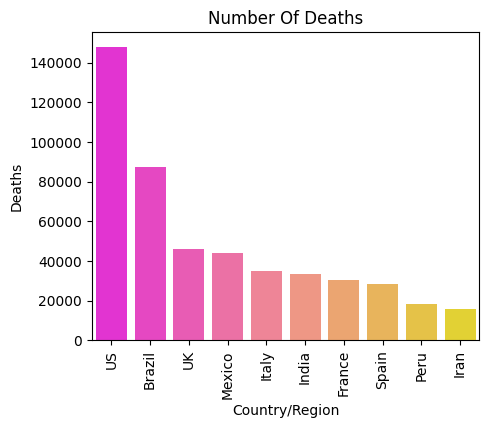

In [18]:
plt.figure(figsize = [5,4])
sns.barplot(Top_deaths['Deaths'], palette = 'spring')
plt.xticks(rotation = 90)
plt.title("Number Of Deaths")
plt.show

##### CONCLUSION: The United States has the highest number of deaths, followed by Brazil and the United Kingdom.

C:\Users\hrith\AppData\Local\Temp\ipykernel_9084\3286797733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Death_cases['Deaths / 100 Cases'], palette = 'spring')


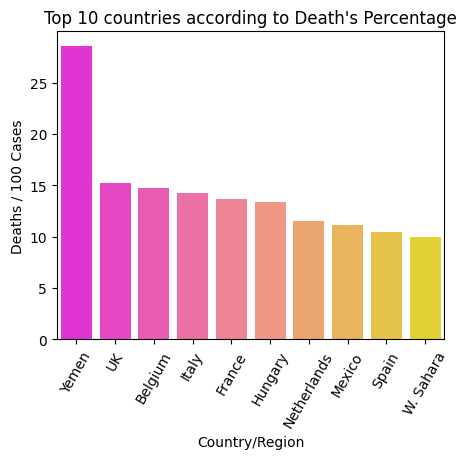

In [19]:
plt.figure(figsize = [5,4])
sns.barplot(Death_cases['Deaths / 100 Cases'], palette = 'spring')
plt.title("Top 10 countries according to Death's Percentage")
plt.xticks(rotation = 60)
plt.show()

##### CONCLUSION: The chart highlights Yemen's significantly higher death percentage compared to the other countries.

C:\Users\hrith\AppData\Local\Temp\ipykernel_9084\2746395755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(WHO['Country/Region'], palette = 'viridis')


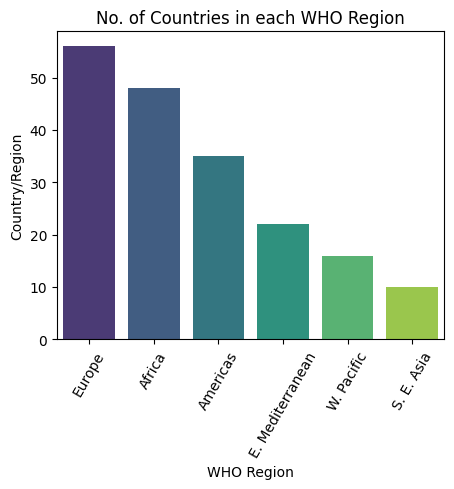

In [20]:
plt.figure(figsize = [5,4])
colors = (0.1, 0.2, 0.5, 0.8)
sns.barplot(WHO['Country/Region'], palette = 'viridis')
plt.title("No. of Countries in each WHO Region")
plt.xticks(rotation = 60)
plt.show()

##### CONCLUSION: WHO Region-Europe has the highest number of countries, followed by Africa, the Americas, the Eastern Mediterranean, the Western Pacific, and Southeast Asia.

The correlation coefficient between Recovery rate and Death Rate: -0.16891981705250228


Text(0, 0.5, 'Death Rate')

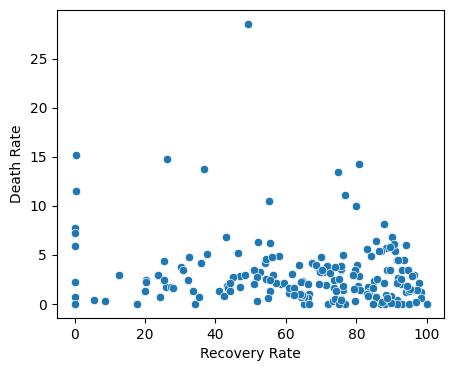

In [21]:
correlation = df['Recovered / 100 Cases'].corr(df['Deaths / 100 Cases'])
print(f'The correlation coefficient between Recovery rate and Death Rate: {correlation}')

plt.figure(figsize = [5,4])
sns.scatterplot(data = df, x = "Recovered / 100 Cases", y = "Deaths / 100 Cases")
plt.xlabel("Recovery Rate")
plt.ylabel("Death Rate")

##### CONCLUSION: The recovery and death rates are negatively correlated, with most recovery rates falling between 60% and 100% under 5% of death rate.

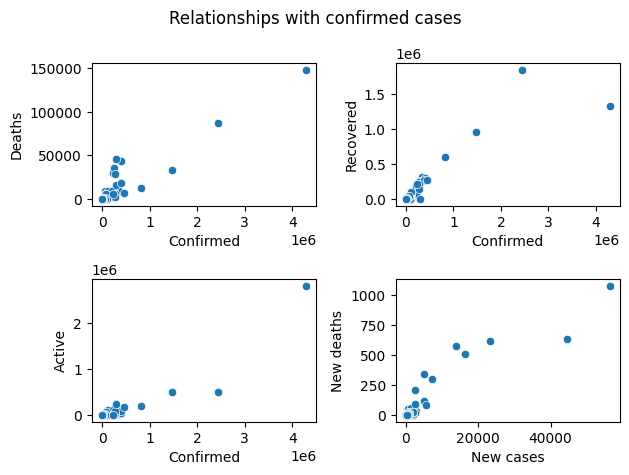

In [22]:
plt.subplot(2,2,1)
sns.scatterplot(data =df, x =  "Confirmed", y = "Deaths")

plt.subplot(2,2,2)
sns.scatterplot(data=df, x = "Confirmed", y = "Recovered")

plt.subplot(2,2,3)
sns.scatterplot(data=df, x = "Confirmed", y = "Active")

plt.subplot(2,2,4)
sns.scatterplot(data=df, x = "New cases", y = "New deaths")

plt.suptitle("Relationships with confirmed cases")

plt.rcParams['figure.figsize'] = [8,4]
plt.tight_layout()
plt.show()

##### CONCLUSION: These plots highlight the expected trend that higher confirmed cases correspond to higher deaths, recoveries, active cases, and new deaths.